In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("./insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
duplicate = df[df.duplicated()]
print(duplicate)
#not dealing with duplicate as this is not a problem

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [10]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [11]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [12]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
X.sex=le.fit_transform(X.sex)
X.smoker=le.fit_transform(X.smoker)
X
# 0 - Female
# 1 - smoker

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest
1334,18,0,31.920,0,0,northeast
1335,18,0,36.850,0,0,southeast
1336,21,0,25.800,0,0,southwest


In [14]:
X=pd.get_dummies(X,columns=["region"],drop_first=True)
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


[]

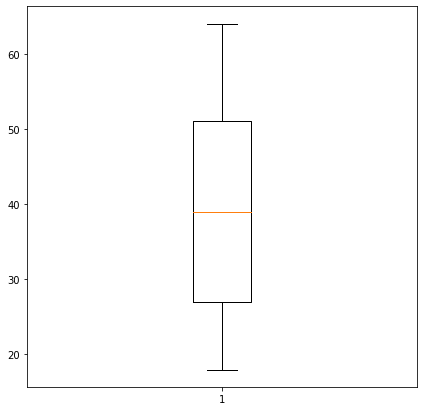

In [15]:
plt.figure(figsize=(7,7))
plt.boxplot(X.age)
plt.plot()

[]

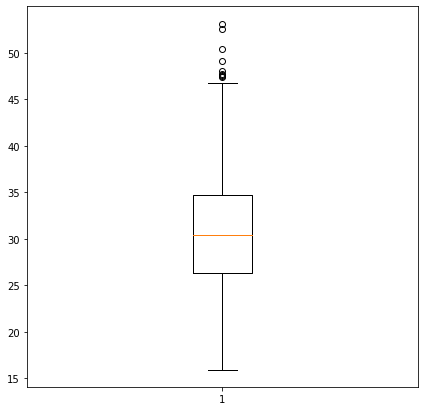

In [16]:
plt.figure(figsize=(7,7))
plt.boxplot(X.bmi)
plt.plot()

In [17]:
tenth_percentile = np.percentile(X.bmi, 10)
ninetieth_percentile = np.percentile(X.bmi, 90)
# print(tenth_percentile, ninetieth_percentile)
X.bmi = np.where(X.bmi<tenth_percentile, tenth_percentile,X.bmi)
X.bmi = np.where(X.bmi>ninetieth_percentile, ninetieth_percentile, X.bmi)
# print("Sample:", sample)
print("New array:",X.bmi)

New array: 0       27.90
1       33.77
2       33.00
3       22.99
4       28.88
        ...  
1333    30.97
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 1338, dtype: float64


In [18]:
X.head()

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,0,0,1
1,18,1,33.77,1,0,0,1,0
2,28,1,33.00,3,0,0,1,0
3,33,1,22.99,0,0,1,0,0
4,32,1,28.88,0,0,1,0,0


In [19]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


[]

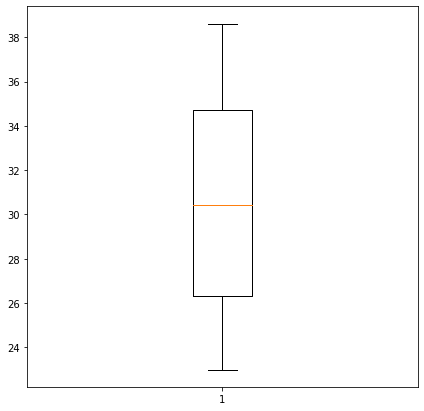

In [20]:
plt.figure(figsize=(7,7))
plt.boxplot(X.bmi)
plt.plot()

<AxesSubplot:>

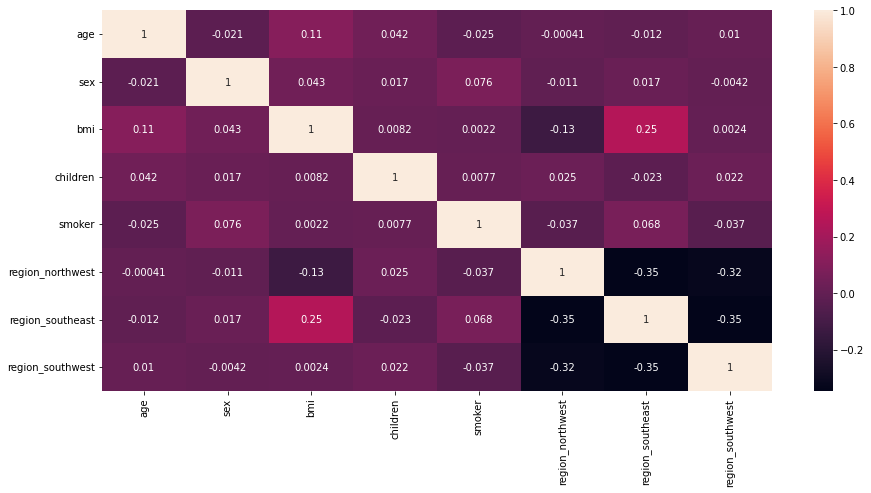

In [21]:
plt.figure(figsize=(15, 7))
sns.heatmap(X.corr(), annot=True)

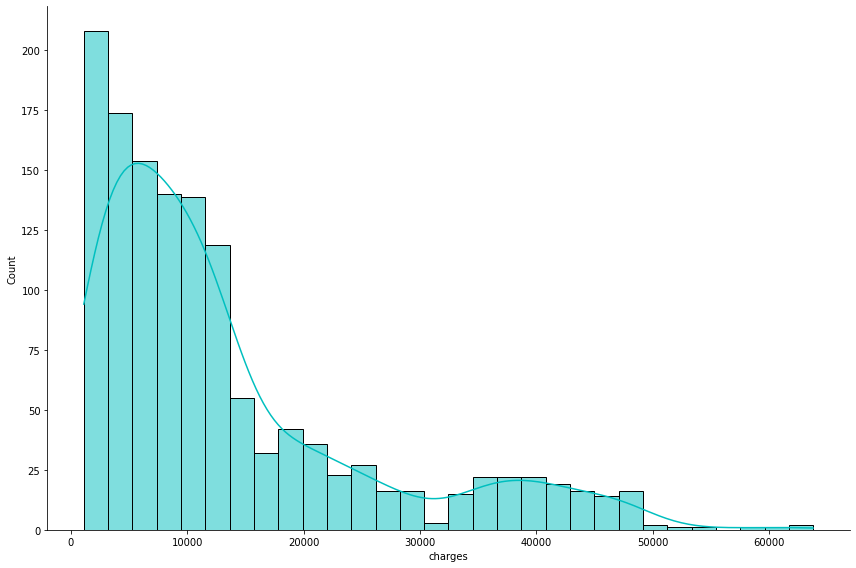

In [22]:
sns.displot(df.charges,kde=True,color="c",height=8,aspect=12/8)
plt.show()

<AxesSubplot:xlabel='age', ylabel='charges'>

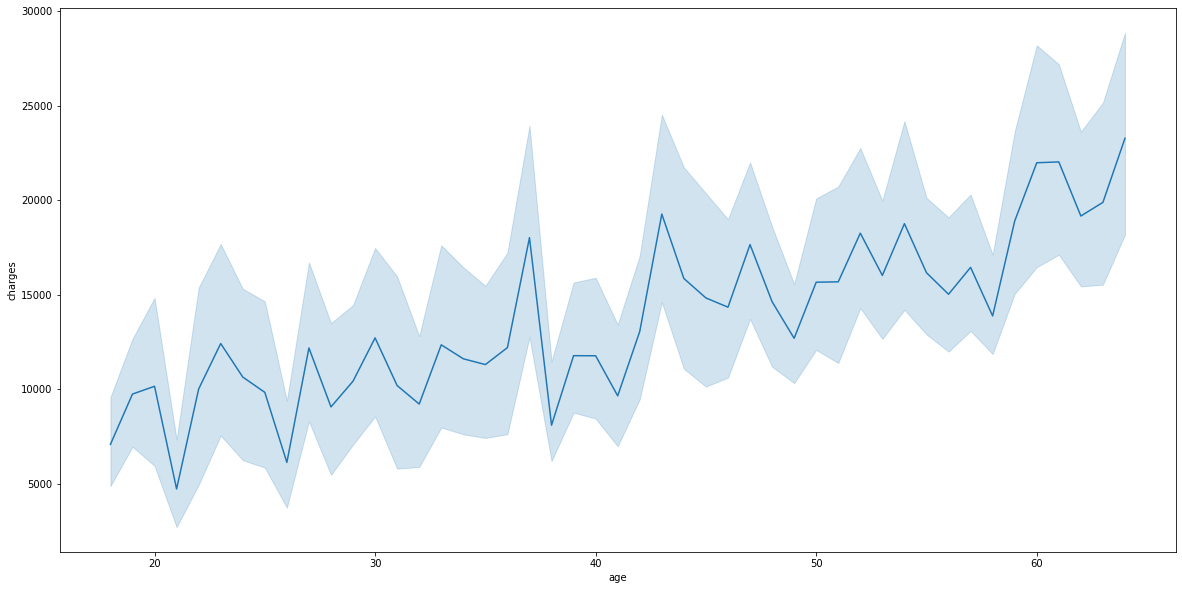

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X['age'],y=y["charges"])

<AxesSubplot:xlabel='age', ylabel='charges'>

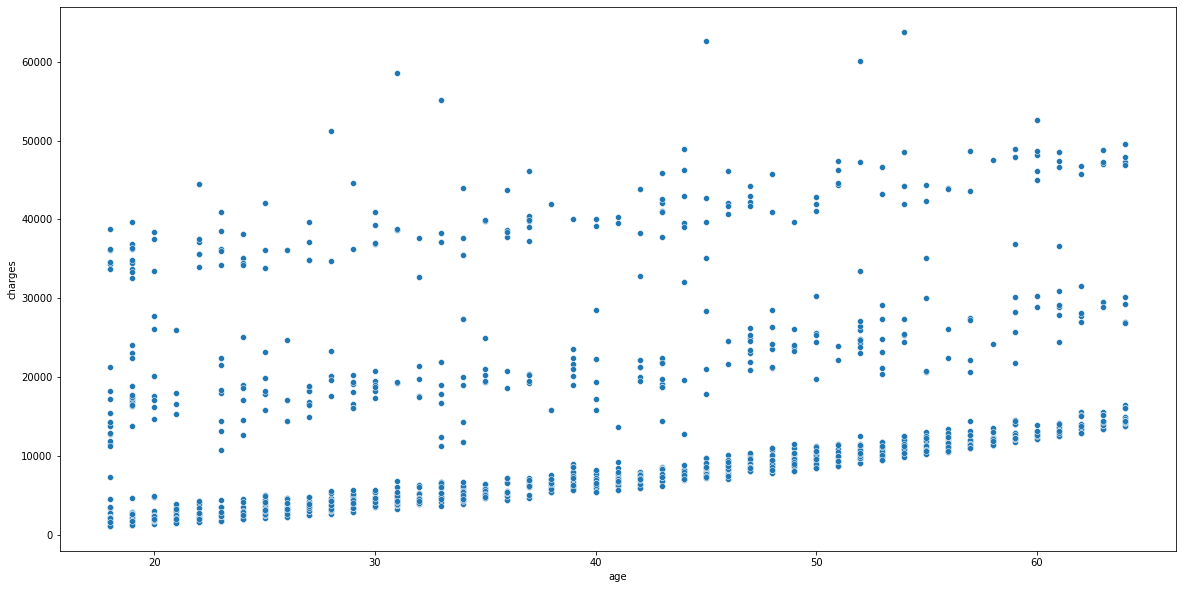

In [24]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X['age'],y=y["charges"])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

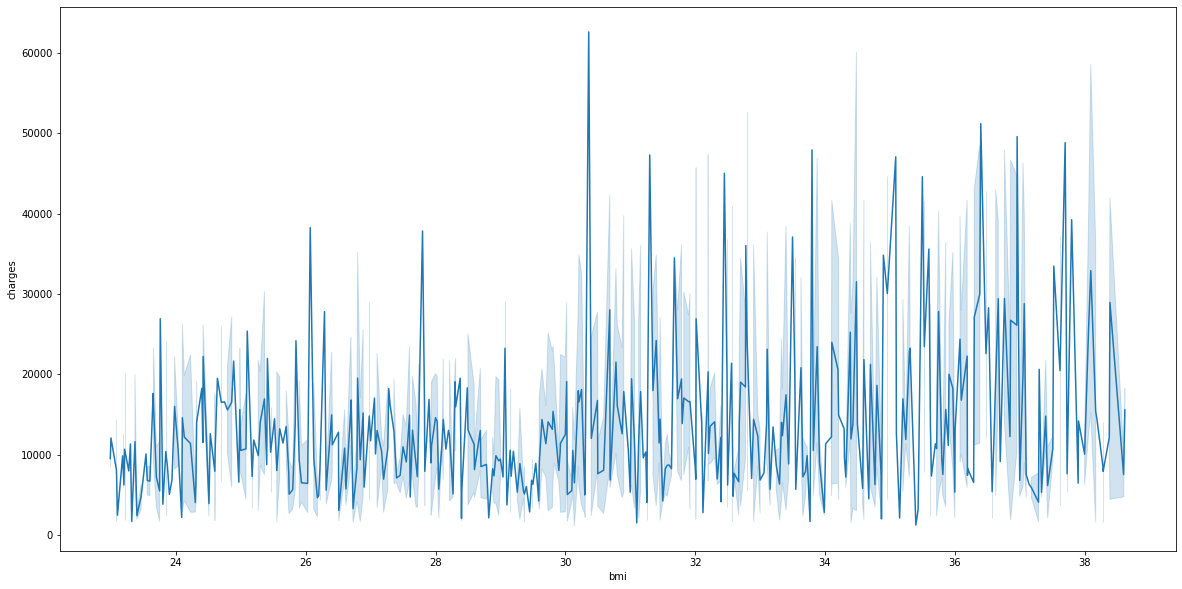

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x=X['bmi'],y=y["charges"])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

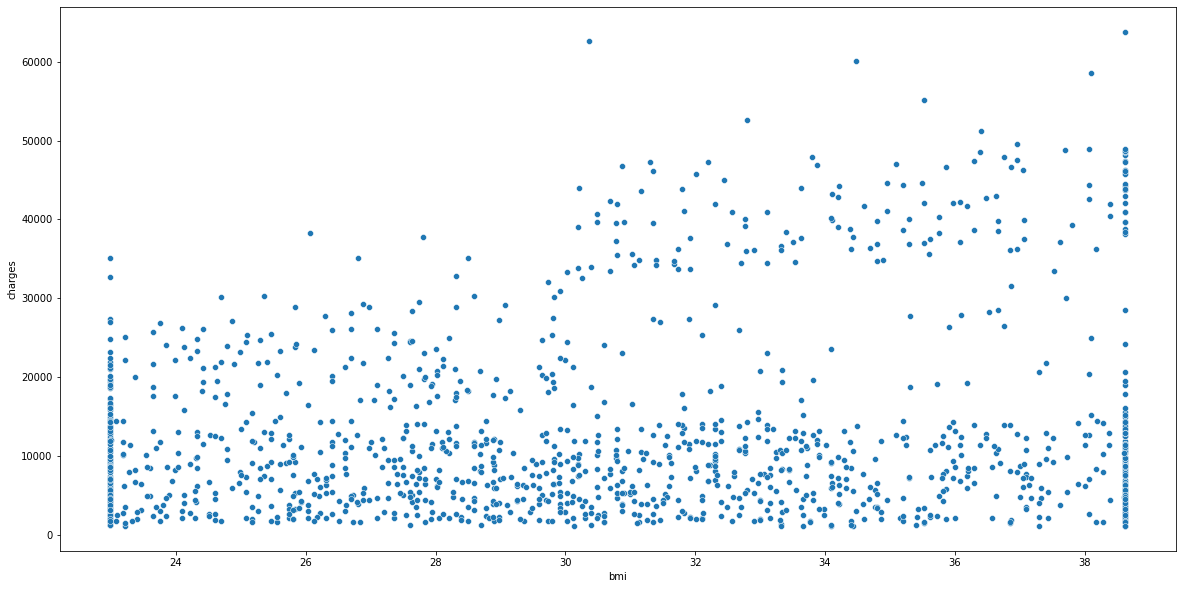

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=X['bmi'],y=y["charges"])

<AxesSubplot:xlabel='sex', ylabel='charges'>

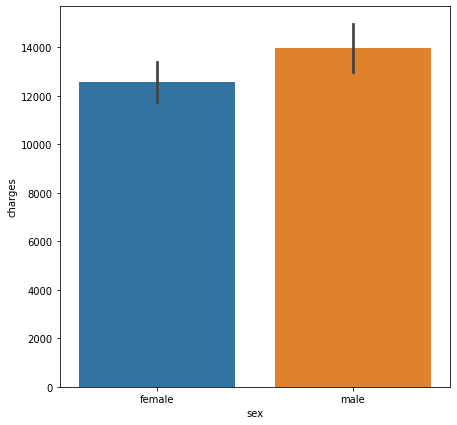

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['sex'],y=y["charges"])

<AxesSubplot:xlabel='sex', ylabel='charges'>

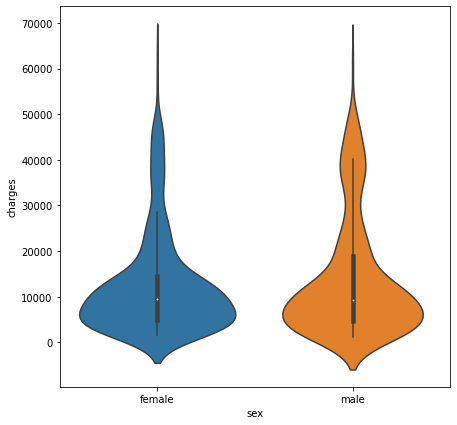

In [28]:
plt.figure(figsize=(7,7))
sns.violinplot(x=df['sex'],y=y["charges"])

<AxesSubplot:xlabel='children', ylabel='charges'>

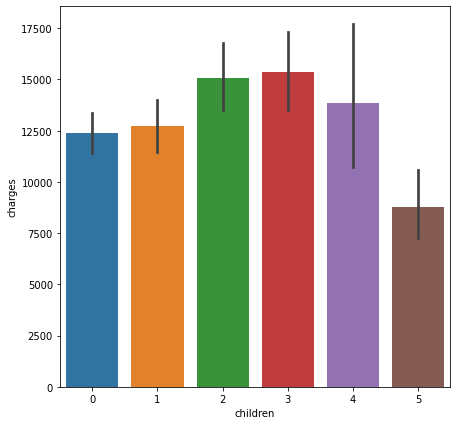

In [29]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['children'],y=y["charges"])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

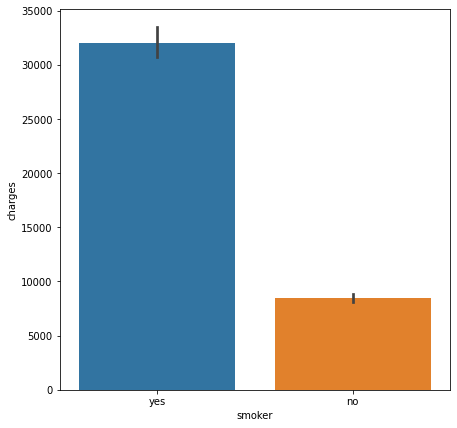

In [30]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['smoker'],y=y["charges"])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

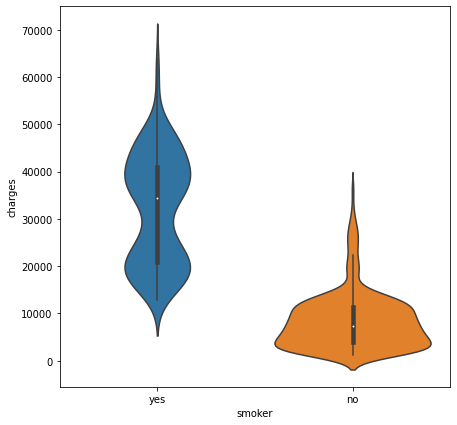

In [31]:
plt.figure(figsize=(7,7))
sns.violinplot(x=df['smoker'],y=y["charges"])

<AxesSubplot:xlabel='region', ylabel='charges'>

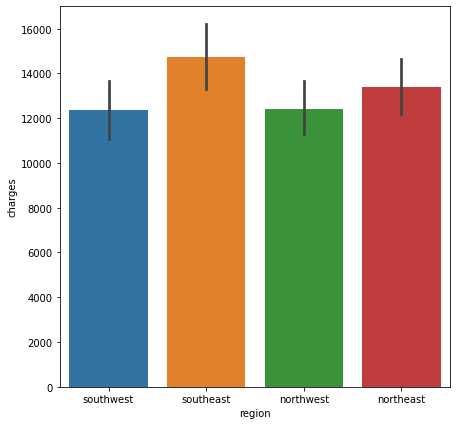

In [32]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['region'],y=y["charges"])

<AxesSubplot:xlabel='region', ylabel='charges'>

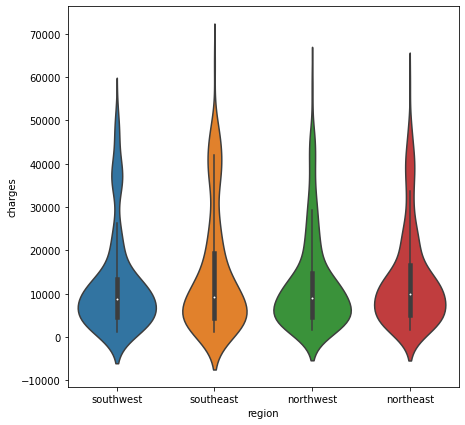

In [33]:
plt.figure(figsize=(7,7))
sns.violinplot(x=df['region'],y=y["charges"])

<AxesSubplot:xlabel='region', ylabel='charges'>

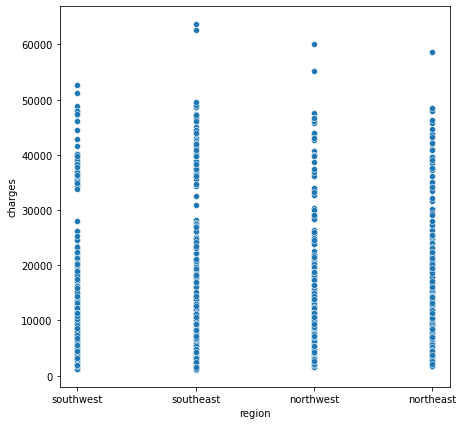

In [34]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['region'],y=y["charges"])

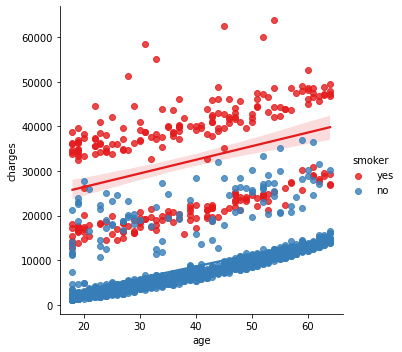

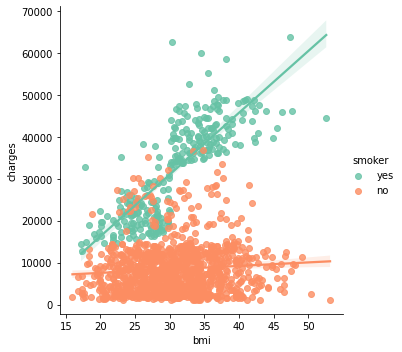

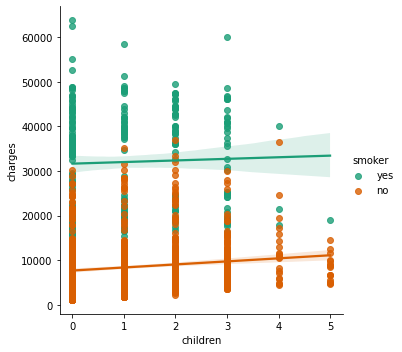

In [35]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Dark2')

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train_scaled, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test_scaled, y_test))

[13201.18205601]
[[ 3.56387325e+03 -6.52271964e+00  2.17058687e+03  5.45906576e+02
   9.52154316e+03 -1.08417362e+02 -3.96789408e+02 -3.49126496e+02]]
0.7990684117881999


In [40]:
y_pred=Lin_reg.predict(X_test_scaled)

Text(0.5, 1.0, 'Actual VS Predicted')

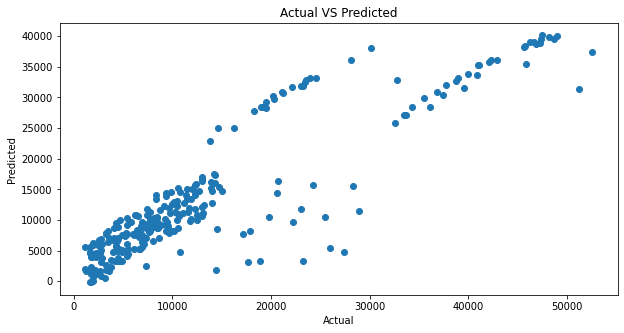

In [41]:
#visualising results
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')

In [42]:
print("R^2 Score = ",metrics.r2_score(y_test,y_pred))
print("mean squared error = ",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R^2 Score =  0.7990684117881999
mean squared error =  31974236.061468624
root mean squared error =  5654.576558989066


In [43]:
print(y_test,y_pred)

          charges
578    9724.53000
610    8547.69130
569   45702.02235
1034  12950.07120
198    9644.25250
...           ...
1084  15019.76005
726    6664.68595
1132  20709.02034
725   40932.42950
963    9500.57305

[268 rows x 1 columns] [[11133.61713727]
 [ 9439.02019381]
 [38311.08524519]
 [16997.00197797]
 [ 7911.58434521]
 [ 3850.87866744]
 [ 1233.46658927]
 [14981.46198797]
 [ 9056.18913181]
 [ 7636.40304127]
 [ 5217.55955593]
 [ 9939.3054556 ]
 [ 8740.86176438]
 [ 3285.26967037]
 [27775.40337923]
 [10584.34154432]
 [10743.88663574]
 [ 6331.47115713]
 [ 8186.52355242]
 [27191.04694821]
 [33170.81442797]
 [14701.08352996]
 [11784.36437427]
 [31930.20256321]
 [ 4525.2745164 ]
 [ 9917.56791293]
 [ 2345.4063009 ]
 [10118.91987175]
 [ 3389.34133192]
 [10485.15891765]
 [ 8913.71045803]
 [40009.76617293]
 [16285.83222574]
 [14471.55195907]
 [24932.64047766]
 [ 4959.69761546]
 [13379.45038796]
 [31304.93682967]
 [33805.33109127]
 [ 3919.59149292]
 [ 4370.09865363]
 [ 3808.95942225]
 [30

In [44]:
print(y_test-y_pred)

          charges
578  -1409.087137
610   -891.328894
569   7390.937105
1034 -4046.930778
198   1732.668155
...           ...
1084   219.082985
726  -1465.019288
1132  4367.346742
725   7346.703547
963    488.747896

[268 rows x 1 columns]
